In [ ]:
import tensorflow as tf
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Dropout, LSTM, CuDNNLSTM

mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [1]:
mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=tf.keras.utils.normalize(X_train,axis=1)
X_test=tf.keras.utils.normalize(X_test,axis=1) #make all data beteween 0 and 1
model=tf.keras.models.Sequential()#2 types of model
model.add(tf.keras.layers.Flatten())#first layer will be syntax layer, we want it flats 
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))#128: how many units in the layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))#use softmax for probablity distribution 

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1)



NameError: name 'tf' is not defined

In [ ]:
val_loss,val_accuracy=model.evaluate(X_test,y_test)
print(val_loss, val_accuracy)#expected to see val_loss higher than the processing 

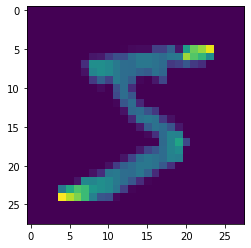

In [10]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], )
plt.show()

In [25]:
model.save('First.model')

In [26]:
new_m=tf.keras.models.load_model('First.model')
predictions=new_m.predict(X_test)#has to be a list
display(predictions)#one hot arrays and probability distribution 

array([[8.1152978e-09, 1.9388361e-08, 5.2666132e-05, ..., 9.9994254e-01,
        2.4543043e-09, 3.5759058e-09],
       [4.1425410e-09, 6.5666994e-05, 9.9993289e-01, ..., 9.2789092e-09,
        2.0581871e-07, 3.9422231e-13],
       [6.5996382e-09, 9.9989820e-01, 3.2539067e-06, ..., 1.1972618e-05,
        7.4343399e-05, 4.1589075e-07],
       ...,
       [6.3139085e-09, 6.8981092e-07, 2.2245624e-07, ..., 1.7676135e-05,
        1.6713728e-06, 5.0956740e-05],
       [5.2336378e-05, 3.1386409e-04, 8.4219619e-06, ..., 6.3526335e-05,
        4.6860953e-03, 1.3747706e-07],
       [1.1115138e-06, 4.9086557e-06, 1.3857243e-06, ..., 2.9391170e-08,
        1.6022523e-06, 1.8818612e-07]], dtype=float32)

In [27]:
import numpy as np
print(np.argmax(predictions[0]))

7


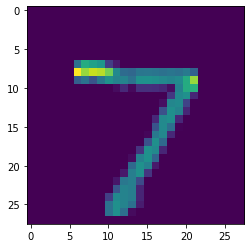

In [28]:
plt.imshow(X_test[0])

In [31]:
Data="C:\\Users\\ROG\\kagglecatsanddogs_3367a\\PetImages"
categories=["Cat","Dog"]

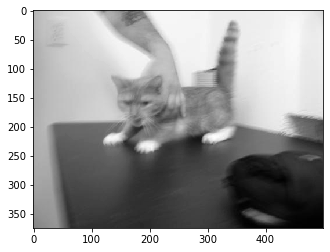

In [32]:
for category in categories:
    path = os.path.join(Data,category) #path to cats or dogs
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)#RGB data has higher memo than gray
        plt.imshow(img_array,cmap='gray')
        plt.show()
        break
    break

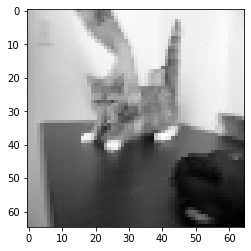

In [33]:
img_size=65
newarray=cv2.resize(img_array,(img_size,img_size))
plt.imshow(newarray,cmap='gray')
plt.show()

In [34]:
train_data=[]
def create():
    for category in categories:
        path = os.path.join(Data,category) #path to cats or dogs
        class_num=categories.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)#RGB data has higher memo than gray
                newarray=cv2.resize(img_array,(img_size,img_size))
                train_data.append([newarray,class_num])#get the train data
            except Exception as e:
                pass
create()

In [35]:
import random
import numpy as np
random.shuffle(train_data)
X=[]
y=[]
for features, label in train_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,img_size, img_size,1)

In [36]:
#store code
import pickle
pickle_out=open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()
pickle_out=open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [37]:
pickle_in=open("y.pickle","rb")
X=pickle.load(pickle_in)

[1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,


In [6]:
#convolution: define some useful thing and pull the useful thing together, slowly extract number from image 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time
pickle_in=open("X.pickle","rb")
X=pickle.load(pickle_in)
pickle_in=open("y.pickle","rb")
y=pickle.load(pickle_in)

In [39]:

X=X/255#normailze the data

import time 
dense_layers=[1]
layer_sizes=[64]
con_layers=[3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for con_layer in con_layers:
            Name='{}-con-{}-nodes-{}-dense-{}'.format(con_layer,layer_size,dense_layer,int(time.time()))
            tensorboard=TensorBoard(log_dir='logs/{}'.format(Name))
            print(Name)
            
            model=Sequential()
            model.add(Conv2D(64,(3,3),input_shape=X.shape[1:]))
            #start at convolution layer , yield
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            for l in range(con_layer-1):
                model.add(Conv2D(64,(3,3)))
                #start at convolution layer , yield
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Flatten())
            for l in range(dense_layer):
                model.add(Dense(512))
                model.add(Activation('relu'))
                model.add(Dropout(0.2))


            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
            model.fit(X,y,batch_size=22,epochs=3, validation_split=0.1,callbacks=[tensorboard])
model.save('64x3-CNN.model')
            

3-con-64-nodes-1-dense-1577902651
Train on 22451 samples, validate on 2495 samples
Epoch 1/3
22451/22451 [==============================] - 112s 5ms/sample - loss: 0.6333 - acc: 0.6261 - val_loss: 0.5534 - val_acc: 0.7251
Epoch 2/3
22451/22451 [==============================] - 115s 5ms/sample - loss: 0.5073 - acc: 0.7527 - val_loss: 0.4613 - val_acc: 0.7788
Epoch 3/3
22451/22451 [==============================] - 121s 5ms/sample - loss: 0.4506 - acc: 0.7854 - val_loss: 0.4442 - val_acc: 0.7920


In [46]:
categories=["Cat","Dog"]
def prepare(filepath):
    imageSize=65
    imagearray=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    newarray=cv2.resize(imagearray,(imageSize,imageSize))
    return newarray.reshape(-1,imageSize,imageSize,1)
model=tf.keras.models.load_model("64x3-CNN.model")
prediction=model.predict([prepare('cat2.jpg')])
print(categories[int(prediction[0][0])])

Cat


In [54]:
prediction=model.predict([prepare('cat3.jpg')])
print(categories[int(prediction[0][0])])

Dog


In [53]:
prediction=model.predict([prepare('cat4.jpg')])
print(prediction)
print(categories[int(prediction[0][0])])

[[1.]]
Dog


In [7]:
mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train= X_train/255.0
X_test=X_test/255.0

model = Sequential()

model.add(LSTM(128, input_shape=(X_train.shape[1:]),activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

opt=tf.keras.optimizers.Adam(lr=1e-3,decay=1e-5)

#means square error =mse
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

model.fit(X_train, y_train, epochs=1, validation_data=(X_test,y_test))

InternalError: cudaGetDevice() failed. Status: cudaGetErrorString symbol not found.

In [ ]:
mnist=tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test)=mnist.load_data()

X_train= X_train/255.0
X_test=X_test/255.0

model = Sequential()

model.add(CuDNNLSTM(128, input_shape=(X_train.shape[1:]),activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))

opt=tf.keras.optimizers.Adam(lr=1e-3,decay=1e-5)

#means square error =mse
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3, validation_data=(X_test,y_test))